## Time-series based analysis of Earthquake Risk Factors

### Part 1: Pulling Earthquake data from USGS API

In this notebook, I imported the earthquake data from the following USGS API: 

[Go to USGS API documentation](https://earthquake.usgs.gov/fdsnws/event/1/)

Importing the required libraries:

- Built a general function to read USGS APIs: "get_EQ_USGS.py"

In [47]:
import requests
import json
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Importing the built function, prior to that added the assets path to the system path

import sys
# inserting the parent directory into current path
sys.path.insert(1, '../assets')

from EQ_USGS import get_EQ_USGS_df

<a id='cell_ref_1'></a>

### 01. Reading in one trial sequence:

In [62]:
start_num=2019

start_str = f"""{start_num}-01-02"""
end_str = f"""{start_num + 2}-01-01"""

In [63]:
Params = {}
Params["get_format"] = "geojson" # Format for importing data

Params["min_date"] = start_str # Minimum date for reporting the data
Params["max_date"] = end_str # Maximum date for reporting the data

Params["min_magnitude"] = "2" # Minimum magnitude of the reporting data
Params["max_magnitude"] = "10" # Maximum magnitude of the reporting data

Params["min_latitude"] = "32" # Minimum latitude
Params["max_latitude"] = "42" # Maximum latitude

Params["min_longitude"] = "-126" # Minimum longitude
Params["max_longitude"] = "-114" # Maximum longitude

Params["order_by"] = "time" # Ordering the data by parameters
Params["limit_data"] = "20000" # Maximum number of data


df = get_EQ_USGS_df(Params)

API status code:  200
14653  number of earthquakes were pulled


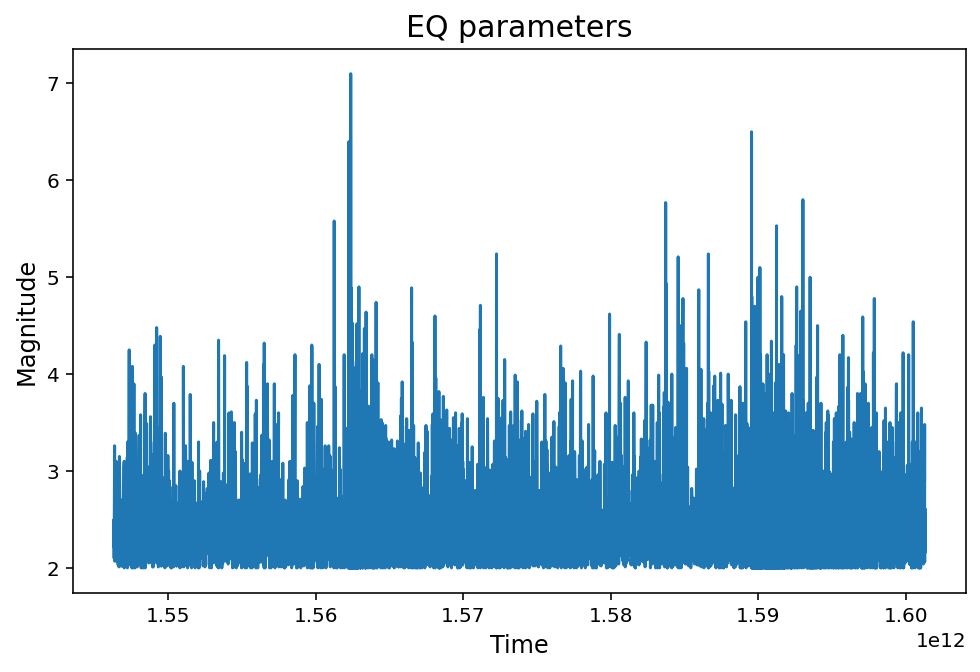

In [64]:
%config InlineBackend.figure_format = 'retina'

plt.figure(figsize = [8, 5])

plt.plot(df.time,df.mag);

# Format title and axis labels
plt.title("EQ parameters", fontsize = 15);

plt.xlabel("Time", fontsize = 12);
plt.ylabel("Magnitude", fontsize = 12);

### 02. Reading the full sequence, with two-year data seperation

In [68]:
for start_num in range(1970, 2021, 1):
    
    # First half of the year
    
    start_str = f"""{start_num}-01-02"""
    end_str = f"""{start_num}-06-01"""
    
    Params = {}
    Params["get_format"] = "geojson" # Format for importing data

    Params["min_date"] = start_str # Minimum date for reporting the data
    Params["max_date"] = end_str # Maximum date for reporting the data

    Params["min_magnitude"] = "2" # Minimum magnitude of the reporting data
    Params["max_magnitude"] = "10" # Maximum magnitude of the reporting data

    Params["min_latitude"] = "32" # Minimum latitude
    Params["max_latitude"] = "42" # Maximum latitude

    Params["min_longitude"] = "-126" # Minimum longitude
    Params["max_longitude"] = "-114" # Maximum longitude

    Params["order_by"] = "time" # Ordering the data by parameters
    Params["limit_data"] = "20000" # Maximum number of data


    df = get_EQ_USGS_df(Params)
    
    file_path = "../datasets/" + "eq_california_yr_" + str(start_num) + "_1_raw" + ".csv"
    df.to_csv(file_path)
    
    
    # Second half of the year
    
    
    
    start_str = f"""{start_num}-06-02"""
    end_str = f"""{start_num + 1}-01-01"""
    

    Params["min_date"] = start_str # Minimum date for reporting the data
    Params["max_date"] = end_str # Maximum date for reporting the data


    df = get_EQ_USGS_df(Params)
    
    file_path = "../datasets/" + "eq_california_yr_" + str(start_num) + "_2_raw" + ".csv"
    df.to_csv(file_path)

API status code:  200
195  number of earthquakes were pulled
API status code:  200
350  number of earthquakes were pulled
API status code:  200
536  number of earthquakes were pulled
API status code:  200
312  number of earthquakes were pulled
API status code:  200
162  number of earthquakes were pulled
API status code:  200
316  number of earthquakes were pulled
API status code:  200
310  number of earthquakes were pulled
API status code:  200
486  number of earthquakes were pulled
API status code:  200
1022  number of earthquakes were pulled
API status code:  200
1959  number of earthquakes were pulled
API status code:  200
1423  number of earthquakes were pulled
API status code:  200
2759  number of earthquakes were pulled
API status code:  200
1500  number of earthquakes were pulled
API status code:  200
2279  number of earthquakes were pulled
API status code:  200
1621  number of earthquakes were pulled
API status code:  200
2153  number of earthquakes were pulled
API status code:

### 02. Reading in the Parkfield EQ data:

In [5]:
Params = {}
Params["get_format"] = "geojson" # Format for importing data

Params["min_date"] = "2004-09-19" # Minimum date for reporting the data
Params["max_date"] = "2004-09-29" # Maximum date for reporting the data

Params["min_magnitude"] = "1" # Minimum magnitude of the reporting data
Params["max_magnitude"] = "10" # Maximum magnitude of the reporting data

Params["min_latitude"] = "32" # Minimum latitude
Params["max_latitude"] = "42" # Maximum latitude

Params["min_longitude"] = "-126" # Minimum longitude
Params["max_longitude"] = "-114" # Maximum longitude

Params["order_by"] = "time" # Ordering the data by parameters
Params["limit_data"] = "2000" # Maximum number of data

df = get_EQ_USGS_df(Params)

API status code:  200
2000  number of earthquakes were pulled


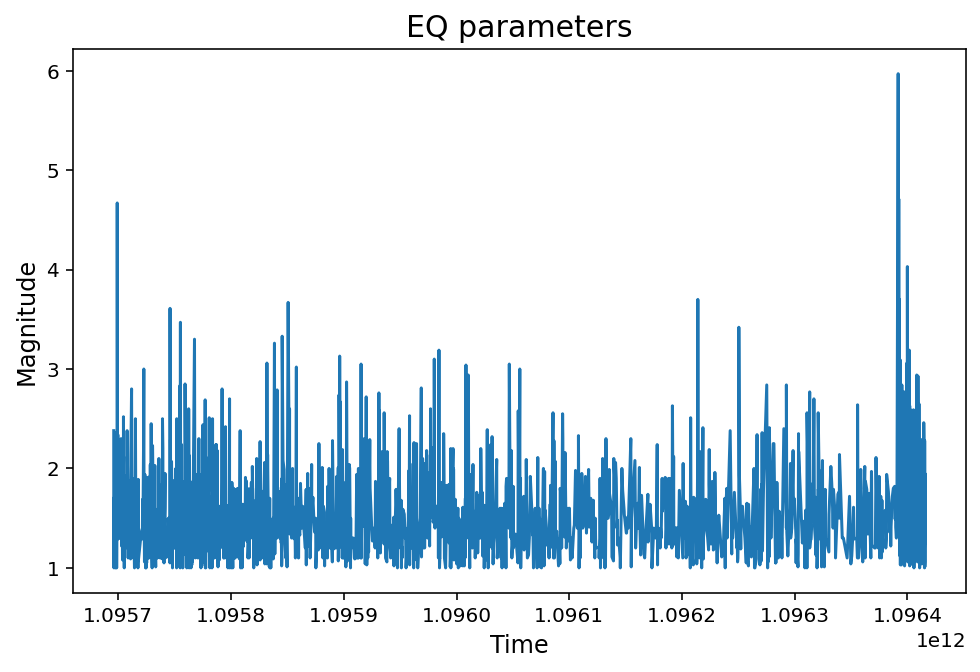

In [6]:
%config InlineBackend.figure_format = 'retina'

plt.figure(figsize = [8, 5])

plt.plot(df.time,df.mag);

# Format title and axis labels
plt.title("EQ parameters", fontsize = 15);

plt.xlabel("Time", fontsize = 12);
plt.ylabel("Magnitude", fontsize = 12);

In [24]:
file_path = "../datasets/" + "eq_parkfield" + "_raw" + ".csv"
df.to_csv(file_path)

In [30]:
print("Hello world!")

Hello world!
